<a href="https://colab.research.google.com/github/SrishtiTyagii/coursework/blob/main/Social_Media_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clean & Analyze Social Media**

---



#Introduction
In this project, we explore social media data (simulated tweet-like data) to analyze user engagement trends. By focusing on metrics such as "likes" across various categories, we can gain valuable insights into how different types of content perform.

#Prerequisites
To successfully run this project, basic Python knowledge and packages such as pandas, Matplotlib, Seaborn, and numpy installed is necessary. These packages allow for data manipulation, visualization, and statistical analysis.


---





#1.   Data Creation and Initial Exploration



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

n = 500

data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

*  This code creates a sample dataset of 500 social media posts, each categorized into one of eight categories. A random number of likes is generated for each post. The dataset includes the date of the post, category, and likes.



In [3]:
df = pd.DataFrame(data)
print(df.head())

        Date Category  Likes
0 2021-01-01     Food   9835
1 2021-01-02  Fitness   1948
2 2021-01-03  Fitness   6306
3 2021-01-04   Family   4992
4 2021-01-05     Food   5541


# 2. DataFrame Info

In [4]:
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None


* This displays the structure of the DataFrame. It shows the data types, counts of non-null entries, and overall memory usage. The dataset has 500 entries, and all columns are non-null.

# 3. DataFrame Summary Statistics

In [5]:
print("\nDataFrame Description:")
print(df.describe())


DataFrame Description:
                      Date        Likes
count                  500   500.000000
mean   2021-09-07 12:00:00  4888.508000
min    2021-01-01 00:00:00    10.000000
25%    2021-05-05 18:00:00  2266.000000
50%    2021-09-07 12:00:00  4699.000000
75%    2022-01-10 06:00:00  7473.500000
max    2022-05-15 00:00:00  9998.000000
std                    NaN  2916.358337


* A summary of the 'Likes' column is displayed, including count, mean, standard deviation, and the minimum and maximum values. This helps understand the distribution and spread of likes in the dataset.

# 4. Category Distribution

In [6]:
print("\nCategory Counts:")
print(df['Category'].value_counts())


Category Counts:
Category
Music      70
Culture    66
Fashion    66
Food       61
Family     61
Health     60
Travel     60
Fitness    56
Name: count, dtype: int64


* This code shows how frequently each category appears in the dataset. The counts help in determining how balanced the dataset is across the different categories.



# 5. Data Cleaning

In [7]:
df = df.dropna()
df = df.drop_duplicates()
df['Date'] = pd.to_datetime(df['Date'])
df['Likes'] = df['Likes'].astype(int)
print("\nCleaned DataFrame:")
print(df.head())
print("\nDataFrame Info after cleaning:")
print(df.info())


Cleaned DataFrame:
        Date Category  Likes
0 2021-01-01     Food   9835
1 2021-01-02  Fitness   1948
2 2021-01-03  Fitness   6306
3 2021-01-04   Family   4992
4 2021-01-05     Food   5541

DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None


* This section cleans the data by removing any null values and duplicates, ensuring that the Date column is in datetime format and the Likes column is converted to integer type.



# 6. Likes distribution visualization

<ipython-input-8-59c0919ba4e5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Likes'], bins=30, kde=True)


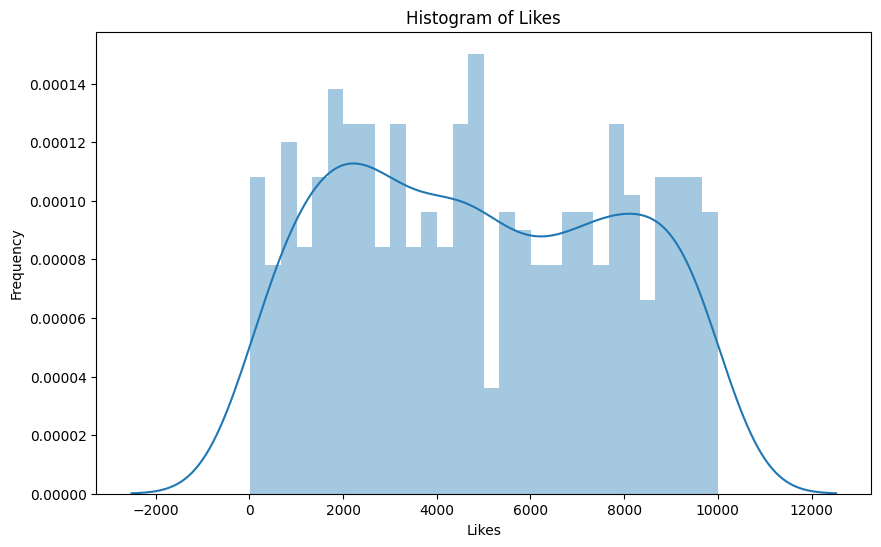

In [8]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Likes'], bins=30, kde=True)
plt.title('Histogram of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

* A histogram of the 'Likes' column is plotted to visualize its distribution. A Kernel Density Estimate (KDE) curve is overlaid to show the probability density, helping identify patterns and spread in the data.

# 7. Boxplot by Category

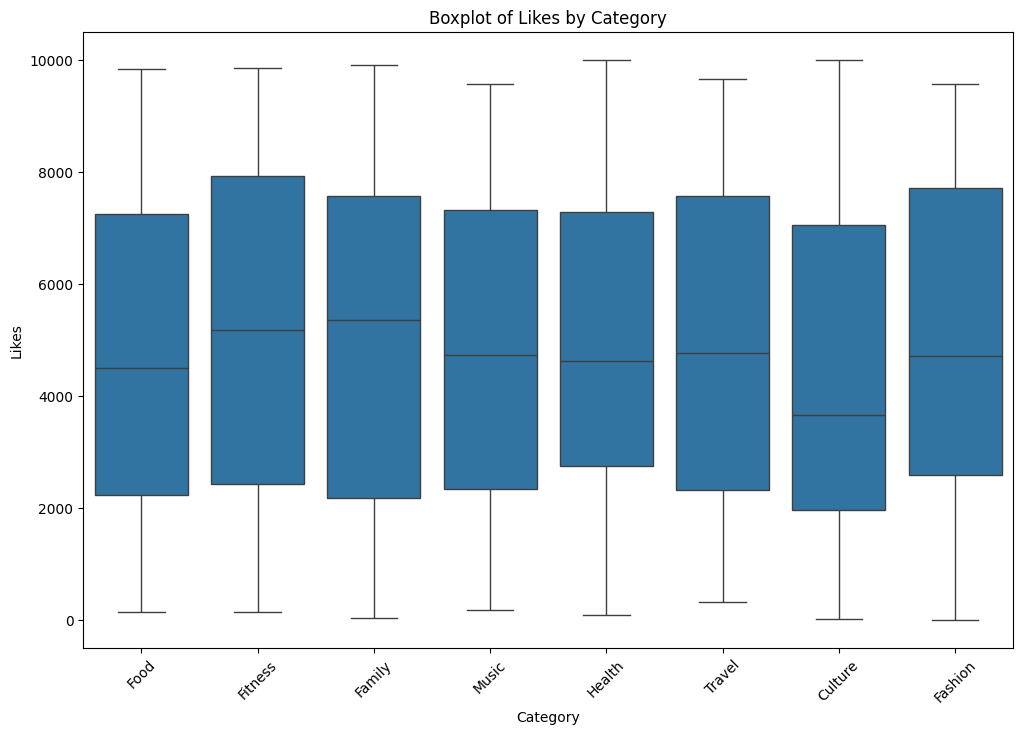

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Boxplot of Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

* This visualization helps highlight variations in engagement, including median values and outliers for each category.

# 8. Mean Likes Calculation

In [12]:
mean_likes = df['Likes'].mean()
print(f"Mean of Likes: {mean_likes:.2f}")

Mean of Likes: 4888.51


* This code calculates the overall mean (average) number of likes for all posts in the dataset.
* The result, 4888.51, gives a single value that represents the average engagement per post across all categories. It helps to understand the general level of user engagement on the platform.

# 9. Mean of Likes by Category

In [11]:
mean_likes_by_category = df.groupby('Category')['Likes'].mean()
print("\nMean of Likes by Category:")
print(mean_likes_by_category)


Mean of Likes by Category:
Category
Culture    4502.909091
Family     4947.590164
Fashion    4927.409091
Fitness    5172.875000
Food       4813.540984
Health     4909.500000
Music      4853.871429
Travel     5040.033333
Name: Likes, dtype: float64


* This code computes the average number of likes for each category by grouping the data by Category and then calculating the mean of the Likes column within each group.
* The results show how different categories, such as "Fitness" (with the highest average of 5172.875) or "Culture" (with the lowest average of 4502.9090), perform in terms of user engagement. It provides valuable insights into which categories tend to attract more or fewer likes, helping to identify trends in content popularity.